# Julia does interactive numerics like Matlab

Interactive numerical and graphical computation, plus
  * familiar syntax, improved
  * rich numeric types: rational numbers, arbitrary-precision numbers
  * metaprogramming: transforming then evaluating chunks of code
  * Unicode variables and source text: $\alpha \; \beta \; \gamma \; \aleph \; x_j \; A_{ij} \; \oplus \; \ldots$
  * notebook interface with embedded graphics and LaTeX: $\text{erf}(x) = \pi^{-1/2} \int_{-x}^x e^{-t^2} dt$
 

In [1]:
using PyPlot
using ODE

INFO: Recompiling stale cache file /home/gibson/.julia/lib/v0.6/DiffEqBase.ji for module DiffEqBase.
INFO: Recompiling stale cache file /home/gibson/.julia/lib/v0.6/ODE.ji for module ODE.


## Solving Ax=b with backslash operator

In [2]:
# random matrix with normally distributed elements
A = randn(4,4)

4×4 Array{Float64,2}:
  0.192052  -1.04631    0.872919  -0.72723 
  1.76094   -1.04615    0.423047   0.190032
 -0.143212   0.496362  -0.102117   0.315543
  2.07304   -0.10772   -0.258105  -0.651107

In [3]:
# familiar colon syntax: get 1st col of A
a₁ = A[:,1]

4-element Array{Float64,1}:
  0.192052
  1.76094 
 -0.143212
  2.07304 

In [4]:
# set up Ax=b problem with known solution x
x = randn(4)
b = A*x

4-element Array{Float64,1}:
  1.18909 
  2.20552 
 -0.487644
  3.91739 

In [6]:
# compute numerical solution x̂ of Ax=b using backslash operator
x̂ = A\b

4-element Array{Float64,1}:
  1.53686 
  0.387805
  0.375557
 -1.33639 

In [7]:
# compute error
@show norm(A*x̂ - b)    # @show macro: print expression = <value of expression>

norm(A * x̂ - b) = 2.482534153247273e-16


2.482534153247273e-16

In [8]:
# what is machine precision for Float64 type?
eps(Float64)

2.220446049250313e-16

In [9]:
# compute condition number of A
cond(A)

13.641439314038475

## SVD and eigenvalues

In [10]:
U, σ, V = svd(A);
@show σ;

σ = [2.95915, 1.57059, 0.859666, 0.216924]


In [11]:
m = 32
λ = eigvals(randn(m,m)/sqrt(m))

32-element Array{Complex{Float64},1}:
  0.897757+0.369542im
  0.897757-0.369542im
  0.931554+0.0im     
 -0.611518+0.835483im
 -0.611518-0.835483im
  0.763435+0.171745im
  0.763435-0.171745im
  0.136905+0.873227im
  0.136905-0.873227im
  0.540959+0.545548im
  0.540959-0.545548im
  -1.10098+0.0im     
  0.245973+0.708414im
          ⋮          
  0.266002+0.276018im
  0.266002-0.276018im
 -0.128755+0.513962im
 -0.128755-0.513962im
 -0.734468+0.0im     
 -0.277156+0.436562im
 -0.277156-0.436562im
 0.0969923+0.0im     
 -0.515909+0.190855im
 -0.515909-0.190855im
 -0.419073+0.0im     
 -0.152837+0.0im     

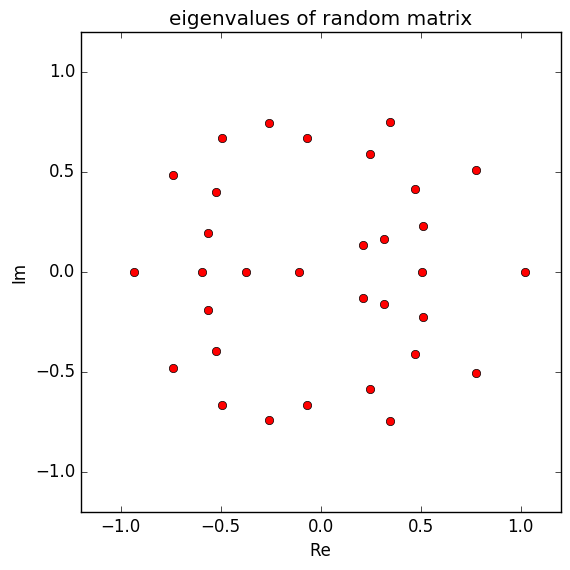

In [11]:
plot(real(λ), imag(λ), "ro")
xlabel("Re")
ylabel("Im")
axis("square")
title("eigenvalues of random matrix")
xlim(-1.2,1.2)
ylim(-1.2,1.2);

## Integrate Lorenz equations

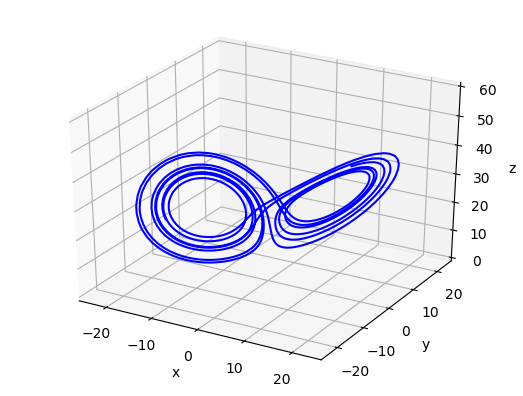

In [2]:
# define Lorenz equations ẋ = f(t,x)
function f(t, x)
    σ = 10
    β = 8/3
    ρ = 28
    [σ*(x[2]-x[1]); x[1]*(ρ-x[3]) - x[2]; x[1]*x[2] - β*x[3]]
end

# integrate ẋ = f(t,x) numerically from t=0 to t=21
t = 0:0.01:10
#x₀ = [0.1; 0.0; 0.0]
#x₀ = [-13.76361 ; -19.57875; 27] # periodic orbit
#x₀ = [-12.59511; -16.97052; 27]  # periodic orbit
x₀ = [-12.0; -17.0; 27.0] 
t,x = ode45(f, x₀, t)

x = hcat(x...)'         # rearrange storage of x (don't ask...)

# plot trajectory x(t)
plot3D(x[:,1], x[:,2], x[:,3], "b-")
xlabel("x")
ylabel("y")
zlabel("z")
xlim(-25,25)
ylim(-25,25)
zlim(0,60)
;

## Function definitions: one-liners

In [13]:
f(x) = x^2 - 3                   # one-line function defn

for x ∈ linspace(-1, 1, 11)
    println("f($x) = $(f(x))")   # string interpolation
end

f(-1.0) = -2.0
f(-0.8) = -2.36
f(-0.6) = -2.64
f(-0.4) = -2.84
f(-0.2) = -2.96
f(0.0) = -3.0
f(0.2) = -2.96
f(0.4) = -2.84
f(0.6) = -2.64
f(0.8) = -2.36
f(1.0) = -2.0


In [14]:
fib(n) = n < 2 ? 1 : fib(n-1) + fib(n-2)  # recursive fibonacci function

for n ∈ 0:10
    println("fib($n) = $(fib(n))")        # string interpolation
end

fib(0) = 1
fib(1) = 1
fib(2) = 2
fib(3) = 3
fib(4) = 5
fib(5) = 8
fib(6) = 13
fib(7) = 21
fib(8) = 34
fib(9) = 55
fib(10) = 89


In [15]:
⊕ = (x,y) -> 3x + y   #  unicode operator defined with anonymous function

3+4im ⊕ 4//5          # Complex{Int64} ⊕ Rational{Int64} → Complex{Rational{Int64}}

49//5 + 12//1*im

In [16]:
typeof(ans)

Complex{Rational{Int64}}

## Free, open, and internet-enabled

May the source be with you

In [17]:
@which A\b

\(A::AbstractArray{T,2} where T, B::Union{AbstractArray{T,1}, AbstractArray{T,2}} where T) in Base.LinAlg at linalg/generic.jl:805

In [18]:
@which ode45(f, x₀, t)

ODE.ode45(fn, y0, tspan) in ODE at /home/gibson/.julia/v0.6/ODE/src/runge_kutta.jl:219

In [19]:
@which cond(A)

cond(A::AbstractArray{T,2} where T) in Base.LinAlg at linalg/dense.jl:911